# 线性回归

## 模型

回归曲线符合线性模型

$$
y = \boldsymbol{\beta}^{T} \boldsymbol{x}
$$

(蕴含常数项(截距))

## 实现

In [257]:
import numpy as np
import statsmodels.api as sm

#! 修改训练集
# X 每一行可以是向量，代表由向量映射到值
X = np.array([
    [1], 
    [2], 
    [3], 
    [4], 
    [5],
    [6],
    [7],
    [8],
])
cX = sm.add_constant(X)
y = np.array([
    12, 
    14, 
    15, 
    17, 
    21,
    22,
    24,
    25,
])

### 回归

In [258]:
model = sm.OLS(y, cX)

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     283.1
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           2.82e-06
Time:                        02:13:09   Log-Likelihood:                -8.0175
No. Observations:                   8   AIC:                             20.03
Df Residuals:                       6   BIC:                             20.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8571      0.593     16.620      0.0

### 显著性检验

见 [回归](#回归) 中的 `.summary()` 结果

- 模型显著性

    `Prob (F-statistic)` $<$ 显著性水平 $\alpha$ $\Rightarrow$ 整个模型 拒绝零假设

- 单个参数显著性

    `P>|t|` $<$ 显著性水平 $\alpha$ $\Rightarrow$ 单个参数 拒绝零假设

### 预测

In [259]:
#
#! 修改待预测数据
newX = np.array([
    [10],
    [20],
])
cnewX = sm.add_constant(newX)
#! 修改置信水平
ALPHA = 0.05

predict = result.get_prediction(cnewX)
psf = predict.summary_frame(ALPHA)

print("预测: ")
print(f"点预测: {predict.predicted_mean}")
print(f"预测均值与误差:\n{psf[['mean', 'mean_se']]}")
print(f"预测区间(置信水平:{ALPHA:.2%}):\n{psf[['obs_ci_lower', 'obs_ci_upper']]}")
print(f"置信区间(置信水平:{ALPHA:.2%}):\n{psf[['mean_ci_lower', 'mean_ci_upper']]}")

预测: 
点预测: [29.61904762 49.38095238]
预测均值与误差:
        mean   mean_se
0  29.619048  0.699787
1  49.380952  1.840252
预测区间(置信水平:5.00%):
   obs_ci_lower  obs_ci_upper
0     27.089047     32.149049
1     44.508038     54.253867
置信区间(置信水平:5.00%):
   mean_ci_lower  mean_ci_upper
0      27.906731      31.331364
1      44.878018      53.883886


### 绘图

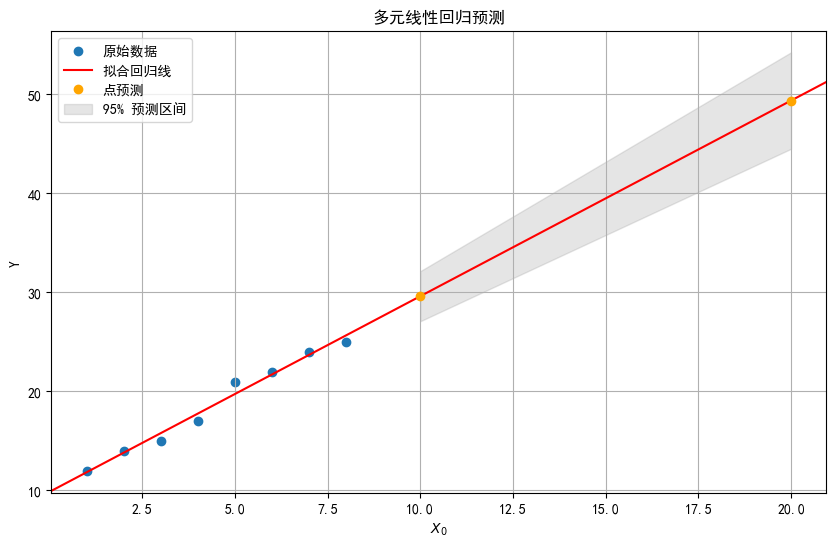

: 

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei' # 中文支持

#! 修改投影维度
PLOT_X_DIMENSION = 0
plt_x = X[:, PLOT_X_DIMENSION]
plt_newx = newX[:, PLOT_X_DIMENSION]

fig, ax = plt.subplots(figsize=(10, 6))

# 绘制原始数据
ax.scatter(plt_x, y, label="原始数据")

# 绘制回归拟合
ax.axline((plt_x[0], result.fittedvalues[0]), (plt_x[1], result.fittedvalues[1]), label = '拟合回归线', color = "red")

# 绘制点预测
ax.plot(plt_newx, predict.predicted_mean, 'o', label = '点预测', color = "orange")

# 绘制区间预测
ax.fill_between(
    plt_newx, 
    psf['obs_ci_lower'],
    psf['obs_ci_upper'], 
    color = 'gray',
    alpha = 0.2,
    label = '95% 预测区间',
    
)

# 绘制
ax.set_xlabel(f"$X_{PLOT_X_DIMENSION}$")
ax.set_ylabel('Y')
ax.set_title('多元线性回归预测')
ax.legend()
ax.grid(True)
plt.show()